
Graph Theory Analysis for SCIFES Data 
============================================


### Group Names and Descriptions
<table style="width:50%; border:1px solid black; border-collapse:collapse; align=left">
  <tr>
    <th style="text-align:left; border:1px solid black; padding:4px;">Group Name</th>
    <th style="text-align:left; border:1px solid black; padding:4px;">Description</th>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">cFES-pre</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling with FES, pre-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">cFES-post</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling with FES, post-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">c-pre</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling only (no FES), pre-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">c-post</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling only (no FES), post-intervention</td>
  </tr>
</table> 

####  1. Load important libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets

# Using the NiftiLabelsMasker
# from nilearn.input_data import NiftiLabelsMasker
from nilearn.maskers import NiftiLabelsMasker

# /Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: 
#         FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. 
#             Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. 
#             Please import from 'nilearn.maskers' instead.
            
from nilearn.connectome import ConnectivityMeasure #communitymeasures
from brainconn import degree, centrality, clustering, core, distance, modularity, utils
from nilearn import plotting 
from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats
from statsmodels.robust.scale import huber

import scipy.io
import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures
from nilearn import datasets

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


####  2. Setup atlas, labels and review brain colormaps

Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


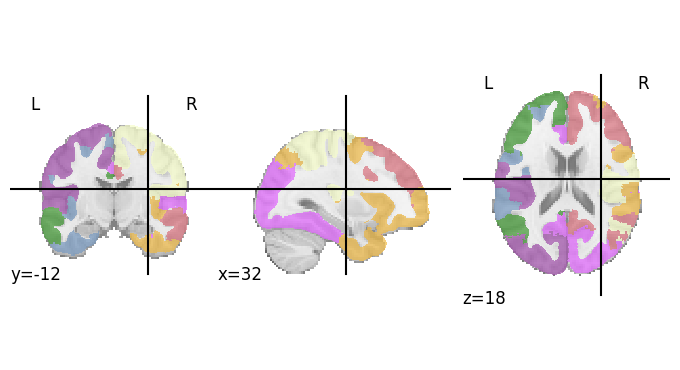

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

####  3. setup group labels for load funtional data 

In [3]:
#%% Load the functional datasets (pre mid post FES, NFES) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data'

# analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY


# if analysis == "ALL":
#     group = ['pre_fes', 'pre_nfes', 'mid_fes', 'mid_nfes', 'post_fes', 'post_nfes']; 
#     group_label = ['Pre FES', 'Pre Non-FES', 'Post NFES']
# #     group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']

# elif analysis == "Group":
#     group = ['fes', 'nfes']; group_label = ['FES', 'Non-FES']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


#### 4. Load fMRI data runs for each group, extract timeseries (ts) and save a copy.

In [4]:
group_label = ['cFES-pre', 'cFES-post', 'c-pre', 'c-post']

#### 5. Load community labels  from matlab

In [5]:
#%% Consensus community label assigment
n_set = 4
# 200xn

## Lee etal Method
S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g1_gamma.mat', squeeze_me=True)['N_all_g1']; #PreFES 
S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g2_gamma.mat', squeeze_me=True)['N_all_g2']; #PreSham 
S_g3 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g3_gamma.mat', squeeze_me=True)['N_all_g3']; #PostFES
S_g4 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g4_gamma.mat', squeeze_me=True)['N_all_g4']; #PostSham
 
communities = [S_g1, S_g2, S_g3, S_g4]

S1_cFES_pre = S_g1
S2_c_pre = S_g2
S3_cFES_post = S_g3
S4_c_post = S_g4

#### 6. Compute recruitment, Integration, module allegiance values 

In [6]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
labels = atlas.labels.astype('U') # covert array of bytes to array of strings
# group_label = ['Pre FES', 'Post FES', 'Pre NFES']
# create static communities (networks' labels)
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
static_communities = np.zeros((200,))
# find networks in atlas.labels and assign a label[1-7] to each
for i, network in enumerate(networks):   
    idx = np.array([network in s for s in labels], dtype=bool)
    static_communities[idx] = i+1 # 1-7

allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
allegiance_coarse = []

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]]) 

def create_coarse_allegiance(allegiance):
    allegiance_coarse_lr = np.zeros((14,14))
    p1, q1 = 0, 0
    for i, p2 in enumerate(pivot):
        for j, q2 in enumerate(pivot):
            allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
            q1 = q2+1
        p1 = p2+1
        q1 = 0    
    # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
    allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
    return allegiance_coarse

for s in range(n_set):
    
    allegiance.append(communitymeasures.allegiance(communities[s]))  
    flexibility.append(communitymeasures.flexibility(communities[s]))
    integration.append(communitymeasures.integration(communities[s], static_communities))
    recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
    promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
    allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))
        
#plt.imshow(allegiance_coarse[1])
#plt.colorbar()
# 1=pre_fes; 2=pre_nfes; 3=post_fes

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc): 
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc




#### 7. Previous permutation test

In [8]:
# # PreFES vs PostFES
# # rec int coeff.
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_cFES_pre.npy', recruitment[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_cFES_pre.npy', integration[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_c_pre.npy', recruitment[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_c_pre.npy', integration[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_cFES_post.npy', recruitment[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_cFES_post.npy', integration[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_c_post.npy', recruitment[3])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_c_post.npy', integration[3])

# # alg
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_cFES_pre.npy', allegiance[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_c_pre.npy', allegiance[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_cFES_post.npy', allegiance[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_c_post.npy', allegiance[3])
# # corr mxt
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_cFES_pre.npy', corr_g1_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_c_pre.npy', corr_g2_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_cFES_post.npy', corr_g5_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_c_post.npy', corr_g6_mean)


# print(f'File saved!')

In [9]:
# Load the data from the .npy files
os.chdir('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/')
cFES_pre_rec = np.load('recruitment_cFES_pre.npy')
cFES_pre_int = np.load('integration_cFES_pre.npy')

c_pre_rec = np.load('recruitment_c_pre.npy')
c_pre_int = np.load('integration_c_pre.npy')

cFES_post_rec = np.load('recruitment_cFES_post.npy')
cFES_post_int = np.load('integration_cFES_post.npy')

c_post_rec = np.load('recruitment_c_post.npy')
c_post_int = np.load('integration_c_post.npy')


alg_cFES_pre = np.load('allegiance_cFES_pre.npy')
alg_c_pre = np.load('allegiance_c_pre.npy')

alg_cFES_post = np.load('allegiance_cFES_post.npy')
alg_c_post = np.load('allegiance_c_post.npy')

# corr_prefes, corr_presham, corr_postfes, corr_postsham
corr_cFES_pre = np.load('corr_cFES_pre.npy')
corr_c_pre = np.load('corr_c_pre.npy')

corr_cFES_post = np.load('corr_cFES_post.npy')
corr_c_post = np.load('corr_c_post.npy')


print(corr_cFES_pre.shape)
# cFES_pre', 'cFES_post', 'c_pre', 'c_post'

(200, 200)


In [10]:
# def perm_test_integration(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     int_s1 = communitymeasures.integration(s1, static_communities)
#     int_s2 = communitymeasures.integration(s2, static_communities)
#     diff = np.abs(int_s2 - int_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         int_sp1 = communitymeasures.integration(sp1, static_communities)
#         int_sp2 = communitymeasures.integration(sp2, static_communities)
#         k += diff < np.abs(int_sp2 - int_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# def perm_test_recruitment(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     rec_s1 = communitymeasures.recruitment(s1, static_communities)
#     rec_s2 = communitymeasures.recruitment(s2, static_communities)
#     diff = np.abs(rec_s2 - rec_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
#         rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
#         k += diff < np.abs(rec_sp2 - rec_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc


# def perm_test_allegiance(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     alg_s1 = communitymeasures.allegiance(s1)
#     alg_s2 = communitymeasures.allegiance(s2)
#     diff = np.abs(alg_s2 - alg_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T 
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         alg_sp1 = communitymeasures.allegiance(sp1)
#         alg_sp2 = communitymeasures.allegiance(sp2)
#         k += diff < np.abs(alg_sp2 - alg_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# pvalue = perm_test_allegiance(S_g1, S_g3, nmc=20000)
# print(f'Shape pvalue: {pvalue.shape} {allegiance[0].shape} {allegiance[2].shape}')
 
# Automatic atlas fetching
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]
label = atlas.labels.astype('U') # covert array of bytes to array of strings

color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*17) + (['red']*19)

#### 8. Proposed permutation-based Friedman test

In [ ]:
# import numpy as np
# from scipy.stats import rankdata

# def perm_test_friedman(pre_labels, post_labels, nmc):
#     """
#     Permutation-based Friedman test to detect pre-post differences in brain functional connectivity
#     for spinal cord injury (SCI) intervention data.

#     Parameters:
#     - pre_labels: np.array of shape (R, S), where R=regions, S=subjects (Pre-intervention)
#     - post_labels: np.array of shape (R, S) (Post-intervention)
#     - nmc: Number of Monte Carlo permutations

#     Returns:
#     - p_values: np.array of shape (R, R) = matrix of p-values per region pair
#     """
#     R, S = pre_labels.shape
#     alg_pre = communitymeasures.allegiance(pre_labels)   # (R, R)
#     alg_post = communitymeasures.allegiance(post_labels) # (R, R)

#     # Stack data for real Friedman computation
#     data_stack = np.stack([alg_pre, alg_post], axis=0)  # (2, R, R)

#     # Compute observed Friedman statistic for each pair
#     chi2_obs = np.zeros((R, R))
#     for i in range(R):
#         for j in range(R):
#             values = np.array([alg_pre[i, j], alg_post[i, j]])  # Two-condition
#             ranks = rankdata(values)
#             mean_ranks = np.mean(ranks)
#             chi2 = (12 * 1 / (2 * 3)) * np.sum((ranks - 1.5) ** 2)  # 1 subject (aggregated allegiance)
#             chi2_obs[i, j] = chi2

#     # Permutation loop
#     exceedances = np.zeros((R, R))
#     for it in range(nmc):
#         # Permute subject-level community assignments
#         permuted = pre_labels.copy()
#         flip_mask = np.random.rand(S) < 0.5
#         permuted[:, flip_mask] = post_labels[:, flip_mask]
#         permuted_post = post_labels.copy()
#         permuted_post[:, flip_mask] = pre_labels[:, flip_mask]

#         alg_perm_pre = communitymeasures.allegiance(permuted)
#         alg_perm_post = communitymeasures.allegiance(permuted_post)

#         for i in range(R):
#             for j in range(R):
#                 values = np.array([alg_perm_pre[i, j], alg_perm_post[i, j]])
#                 ranks = rankdata(values)
#                 mean_ranks = np.mean(ranks)
#                 chi2_perm = (12 * 1 / (2 * 3)) * np.sum((ranks - 1.5) ** 2)

#                 if chi2_perm >= chi2_obs[i, j]:
#                     exceedances[i, j] += 1

#         if it % 10 == 0:
#             print(f'Permutation #: {it}')

#     # Compute empirical p-values
#     p_values = exceedances / nmc
#     return p_values

In [ ]:
# alg_pvalue = perm_test_friedman(S1_a, S1_b, nmc=20000)
# print(f'Shape pvalue: {alg_pvalue.shape} {S1_a.shape} {S1_b.shape}')

In [ ]:
# cFES_pre', 'cFES_post', 'c_pre', 'c_post'

### Statistical tests

In [24]:
corr_a = corr_cFES_pre
corr_b = corr_cFES_post

# corr_a = corr_c_pre
# corr_b = corr_c_post

# corr_a = corr_cFES_pre
# corr_b = corr_c_pre

# SMN Region
s1 = corr_a[14:30, 14:30]     # Shape (16, 16)
s2 = corr_a[14:30, 115:134]   # Shape (16, 19)
s3 = corr_a[115:134, 14:30]   # Shape (19, 16)
s4 = corr_a[115:134, 115:134] # Shape (19, 19)

print(f'Shape pvalue: {s1.shape} {s2.shape} {s3.shape} {s4.shape}')

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

fc_smn_matrix_a = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# Print the shape of the resulting matrix
print("FC of SMN matrix cFES_pre:", fc_smn_matrix_a.shape)

# 
# Slice rows and columns from 15:31 and 116:135
s1 = corr_b[14:30, 14:30]     # Shape (16, 16)
s2 = corr_b[14:30, 115:134]   # Shape (16, 19)
s3 = corr_b[115:134, 14:30]   # Shape (19, 16)
s4 = corr_b[115:134, 115:134] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

fc_smn_matrix_b = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# Print the shape of the resulting matrix
print("FC of SMN matrix c_pre:", fc_smn_matrix_b.shape)

Shape pvalue: (16, 16) (16, 19) (19, 16) (19, 19)
FC of SMN matrix PreFES: (35, 35)
FC of SMN matrix PreSham: (35, 35)
(35,)
(35,)
(35,)
(35,)


In [ ]:
# ************* # cFES_pre', 'cFES_post', 'c_pre', 'c_post'
# Group #1
x_rec = cFES_pre_rec
z_rec = cFES_post_rec
x_in = cFES_pre_int
z_in = cFES_post_int

# Group #2
# x_rec = c_pre_rec
# z_rec = c_post_rec
# x_in = c_pre_int
# z_in = c_post_int

# Group #3
# x_rec = cFES_pre_rec
# z_rec = c_pre_rec
# x_in = cFES_pre_int
# z_in = c_pre_int

slice1 = x_rec[14:30]   
slice2 = x_rec[115:134]  
x_rec_SMN = np.concatenate((slice1, slice2))
print(x_rec_SMN.shape) 

slice1 = z_rec[14:30]   
slice2 = z_rec[115:134]  
z_rec_SMN = np.concatenate((slice1, slice2))
print(z_rec_SMN.shape) 

slice1 = x_in[14:30]   
slice2 = x_in[115:134]  
x_in_SMN = np.concatenate((slice1, slice2))
print(x_in_SMN.shape) 

slice1 = z_in[14:30]   
slice2 = z_in[115:134]  
z_in_SMN = np.concatenate((slice1, slice2))
print(z_in_SMN.shape)



In [25]:
# S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post

S1_a = S1_cFES_pre
S1_b = S3_cFES_post

# S1_a = S2_c_pre
# S1_b = S4_c_post

# S1_a = S1_cFES_pre
# S1_b = S2_c_pre

slice1 = S1_a[14:30, :]  
slice2 = S1_a[115:134, :] 
S1_a_SMN = np.vstack((slice1, slice2))
print(f'SMN cFES_pre shape: {S1_a_SMN.shape}') 

slice1 = S1_b[14:30, :]  
slice2 = S1_b[115:134, :] 
S1_b_SMN = np.vstack((slice1, slice2))
print(f'SMN cFES_post shape: {S1_b_SMN.shape}') 

SMN PreFES shape: (35, 14)
SMN PostFES shape: (35, 14)


In [5]:
# SMN Perm-test cFES_pre - cFES_post
# static_communities = np.zeros((35,))
# pvalue_int1 = perm_test_integration(S1_a_SMN, S1_b_SMN, nmc=20000) ##  
# pvalue_rec1 = perm_test_recruitment(S1_a_SMN, S1_b_SMN, nmc=20000) ##

In [2]:
# print("pvalue_int1:", pvalue_int1.shape)

#### 12. Plot brain glass visualization (significant regions of recruitment and integration coefficients)  

In [269]:
# diff_rec_abs1 = abs(cFES_pre_rec - cFES_post_rec)
# diff_int_abs1 = abs(cFES_pre_int - cFES_post_int)

# diff_rec_abs1 = abs(c_pre_rec - c_post_rec)
# diff_int_abs1 = abs(c_pre_int - c_post_int)

diff_rec_abs1 = abs(cFES_pre_rec - c_pre_rec)
diff_int_abs1 = abs(cFES_pre_int - c_pre_int)


diff_rec1 = diff_rec_abs1 
diff_int1 = diff_int_abs1 
idx = 0
# Function to validate and plot markers
def plot_markers(coords, color, size, output_path, idx):
    if len(coords) == len(color) == len(size) and len(coords) > 0:
        # Proceed with plotting only if the lengths of arrays match and they are not empty
        # idx=idx+1
        print(f'View: {idx}')
        view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
        view.open_in_browser()
        view.save_as_html(output_path)

    else:
        print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
              f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
        # idx=idx+1
        
color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']
# Recruitment pre-post
sig_rec2 = np.where((diff_rec1 >= 0.0))[0] #(diff_rec1 >= 0.2) & (pvalue_rec1 == 0)
sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
color_g2 = [color[i] for i in sig_rec2_f]
size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f]
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2]
# color_g2 = [color[i] for i in sig_rec2]
# size_g2 = [int(diff_rec[i] * 100) for i in sig_rec2]
idx=idx+1
plot_markers(coords_g2, color_g2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)
# color_gb

# Integration pre-post
sig_int4 = np.where((diff_int1 >= 0.0) )[0] #& (pvalue_int1 == 0)
filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
color_g4 = [color[i] for i in filtered_sig_int4]
size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]

idx = idx+1
plot_markers(coords_g4, color_g4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# View 1 = Rec PreFES vs PostFES
# View 2 = Int PreFES vs PostFES

View: 1
View: 2


In [271]:
# diff_rec = diff_rec_abs
diff_rec1 = diff_rec_abs1
# diff_int = diff_int_abs
diff_int1 = diff_int_abs1 
idx = 0

lime = (0, 1, 1)
cyan = (0, 1, 0)


# Function to validate and plot markers
def plot_markers(coords, color, size, output_path, idx):
    if len(coords) == len(color) == len(size) and len(coords) > 0:
        # Proceed with plotting only if the lengths of arrays match and they are not empty
        # idx=idx+1
        print(f'View: {idx}')
        view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
        view.open_in_browser()
        view.save_as_html(output_path)

    else:
        print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
              f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
        # idx=idx+1

        
# color_g2b = ['purple', cyan, lime, lime, lime, lime, lime, lime, lime, lime, 'green','violet', lime,
#               lime, lime, lime, lime, lime, lime, lime, lime, lime, lime,'green','orange','orange','red']
color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']
        
# Recruitment 1-3
sig_rec2 = np.where((diff_rec1 >= 0.0))[0]  
sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
color_g2 = [color[i] for i in sig_rec2_f]
size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f] 
idx=idx+1
plot_markers(coords_g2, color_gb, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)

# Integration 1-3
sig_int4 = np.where((diff_int1 >= 0.0))[0]  
filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
color_g4 = [color[i] for i in filtered_sig_int4]
size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]


idx = idx+1
plot_markers(coords_g4, color_gb, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# View # = Rec PreFES vs PreNFES
# View # = Rec PreFES vs PostFES
# View # = Int PreFES vs PreNFES
# View # = Int PreFES vs PostFES

View: 1
View: 2


In [272]:
# pvalue_int1

In [273]:
print(f' shape :{(pvalue_int1.shape)} {(pvalue_rec1.shape)} {(diff_rec1.shape)} {(diff_int1.shape)} ')

 shape :(35,) (35,) (200,) (200,) 


In [277]:
# x_rec z_rec x_in z_in
print(f' shape: {len(x_rec3)} {len(z_rec3)}, {len(x_in3)} {len(z_in3)}')

x_rec3 = x_rec3[:35]
z_rec3 = z_rec3[:35]
x_in3 = x_in3[:35]
z_in3 = z_in3[:35]

print(f' reshape: {len(x_rec3)} {len(z_rec3)}, {len(x_in3)} {len(z_in3)}')

 shape: 41 41, 39 39
 reshape: 35 35, 35 35


In [279]:
group_label = ['Pre FES', 'Pre Sham'] # 'Pre FES', 'Pre Sham', 'Post FES', 'Post Sham'

In [26]:
# S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
S1_a = S1_cFES_pre
S1_b = S3_cFES_post

# S1_a = S2_c_pre
# S1_b = S4_c_post

# S1_a = S1_cFES_pre
# S1_b = S2_c_pre

#### 15.  Plot allegiance matrix all regions 200x200

In [32]:
# S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
alg_a = alg_cFES_pre
alg_b = alg_cFES_post
alg_c = alg_pvalue

# alg_a = alg_c_pre
# alg_b = alg_c_post
# alg_c = alg_pvalue

# alg_a = alg_S1_cFES
# alg_b = alg_cFES_post
# alg_c = alg_pvalue

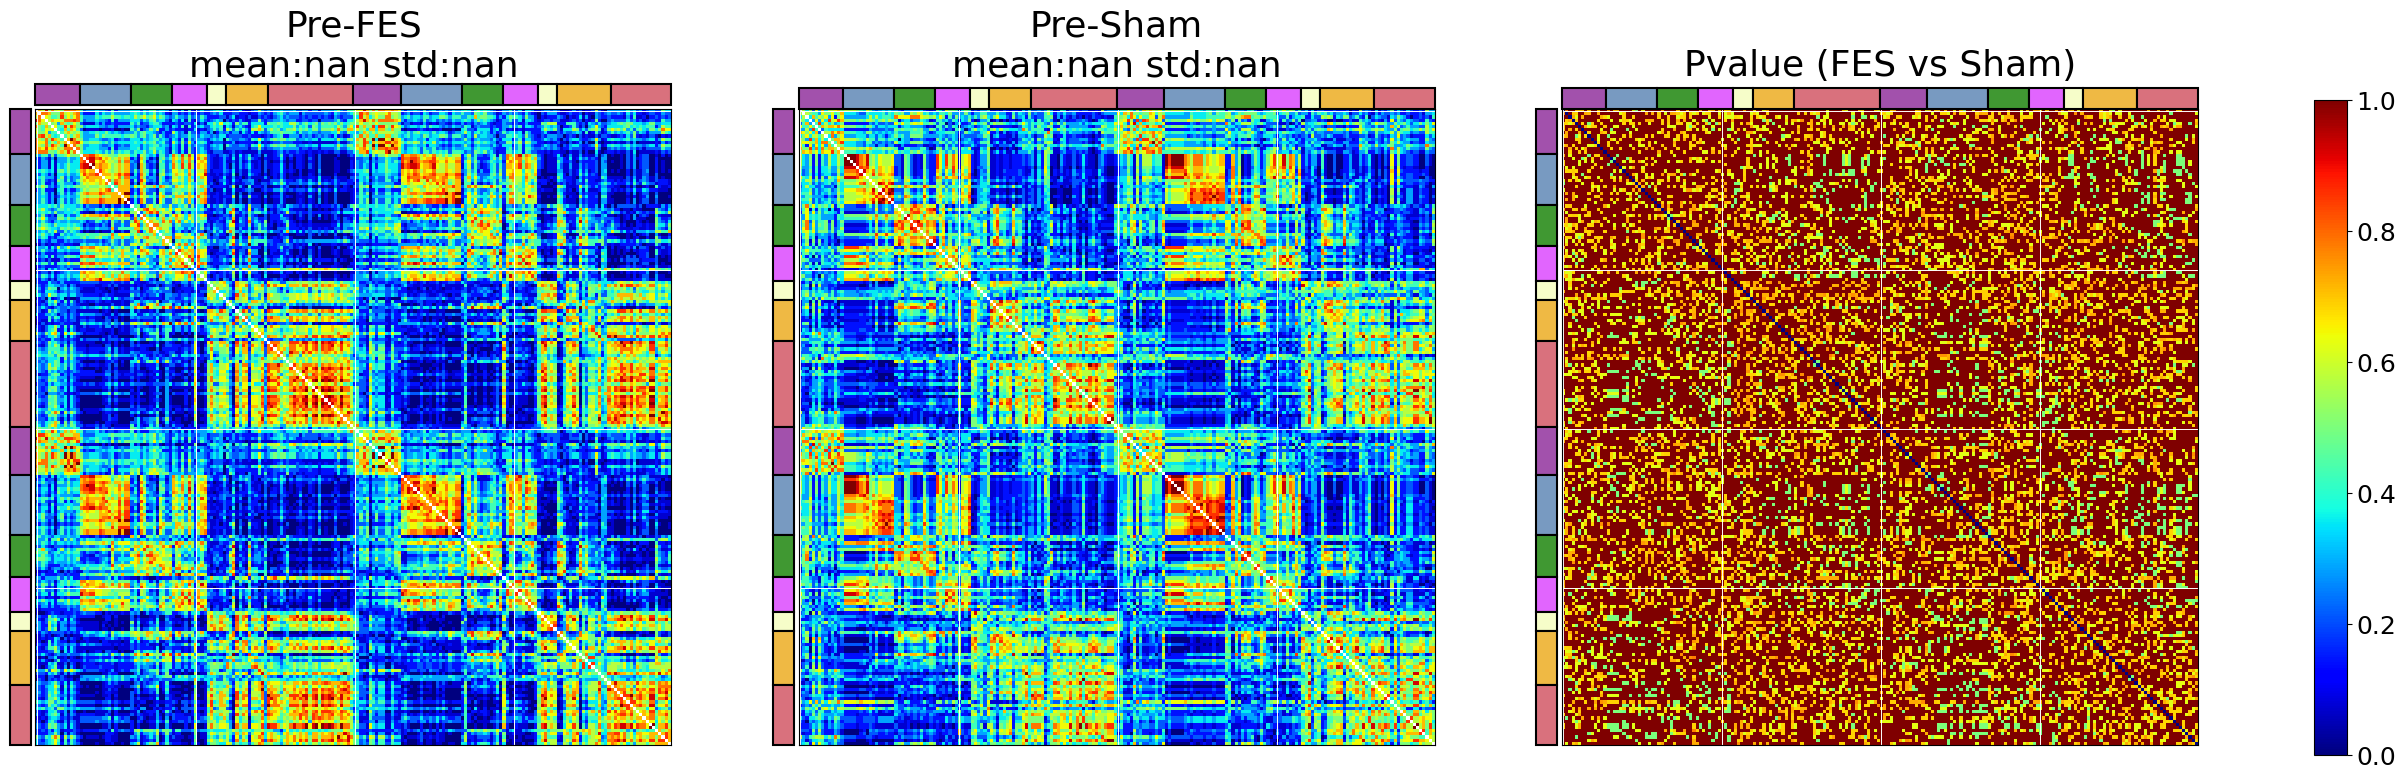

In [36]:
# Allegiance matrix 200x200 
cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap

# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix
# plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
im1 = axs[0].matshow(alg_a, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'cFES-pre\nmean:{np.mean(alg_a):.4f} std:{np.std(alg_a):.4f}', fontsize=26, y=1.04)

# Plot the second matrix
im2 = axs[1].matshow(alg_b, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'c-pre\nmean:{np.mean(alg_b):.4f} std:{np.std(alg_b):.4f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(alg_c, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue (pre vs post)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

#### 16. Plot allegiance matrix for SMN region only  

In [295]:
## S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
# Slice rows and columns from 15:31 and 116:135
 
# alg_a = alg_cFES_pre
# alg_b = alg_cFES_post
# alg_c = alg_pvalue

s1 = alg_a[14:30, 14:30]     # Shape (16, 16)
s2 = alg_a[14:30, 115:134]   # Shape (16, 19)
s3 = alg_a[115:134, 14:30]   # Shape (19, 16)
s4 = alg_a[115:134, 115:134] # Shape (19, 19)

print(f'Shape pvalue: {s1.shape} {s2.shape} {s3.shape} {s4.shape}')

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
alg_smn_a = np.vstack((top_half, bottom_half))  # Shape (35, 35)

s1 = alg_b[14:30, 14:30]     # Shape (16, 16)
s2 = alg_b[14:30, 115:134]   # Shape (16, 19)
s3 = alg_b[115:134, 14:30]   # Shape (19, 16)
s4 = alg_b[115:134, 115:134] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
alg_smn_b = np.vstack((top_half, bottom_half))  # Shape (35, 35)

s1 = alg_c[14:30, 14:30]     # Shape (16, 16)
s2 = alg_c[14:30, 115:134]   # Shape (16, 19)
s3 = alg_c[115:134, 14:30]   # Shape (19, 16)
s4 = alg_c[115:134, 115:134] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
pvalue_smn_alg_c = np.vstack((top_half, bottom_half))  # Shape (35, 35)

print(f'Allegiance SMN PreFES:{alg_smn_a.shape} {alg_smn_b.shape} {pvalue_smn_alg_c.shape}')

Shape pvalue: (16, 16) (16, 19) (19, 16) (19, 19)
Allegiance SMN PreFES:(35, 35) (35, 35) (35, 35)


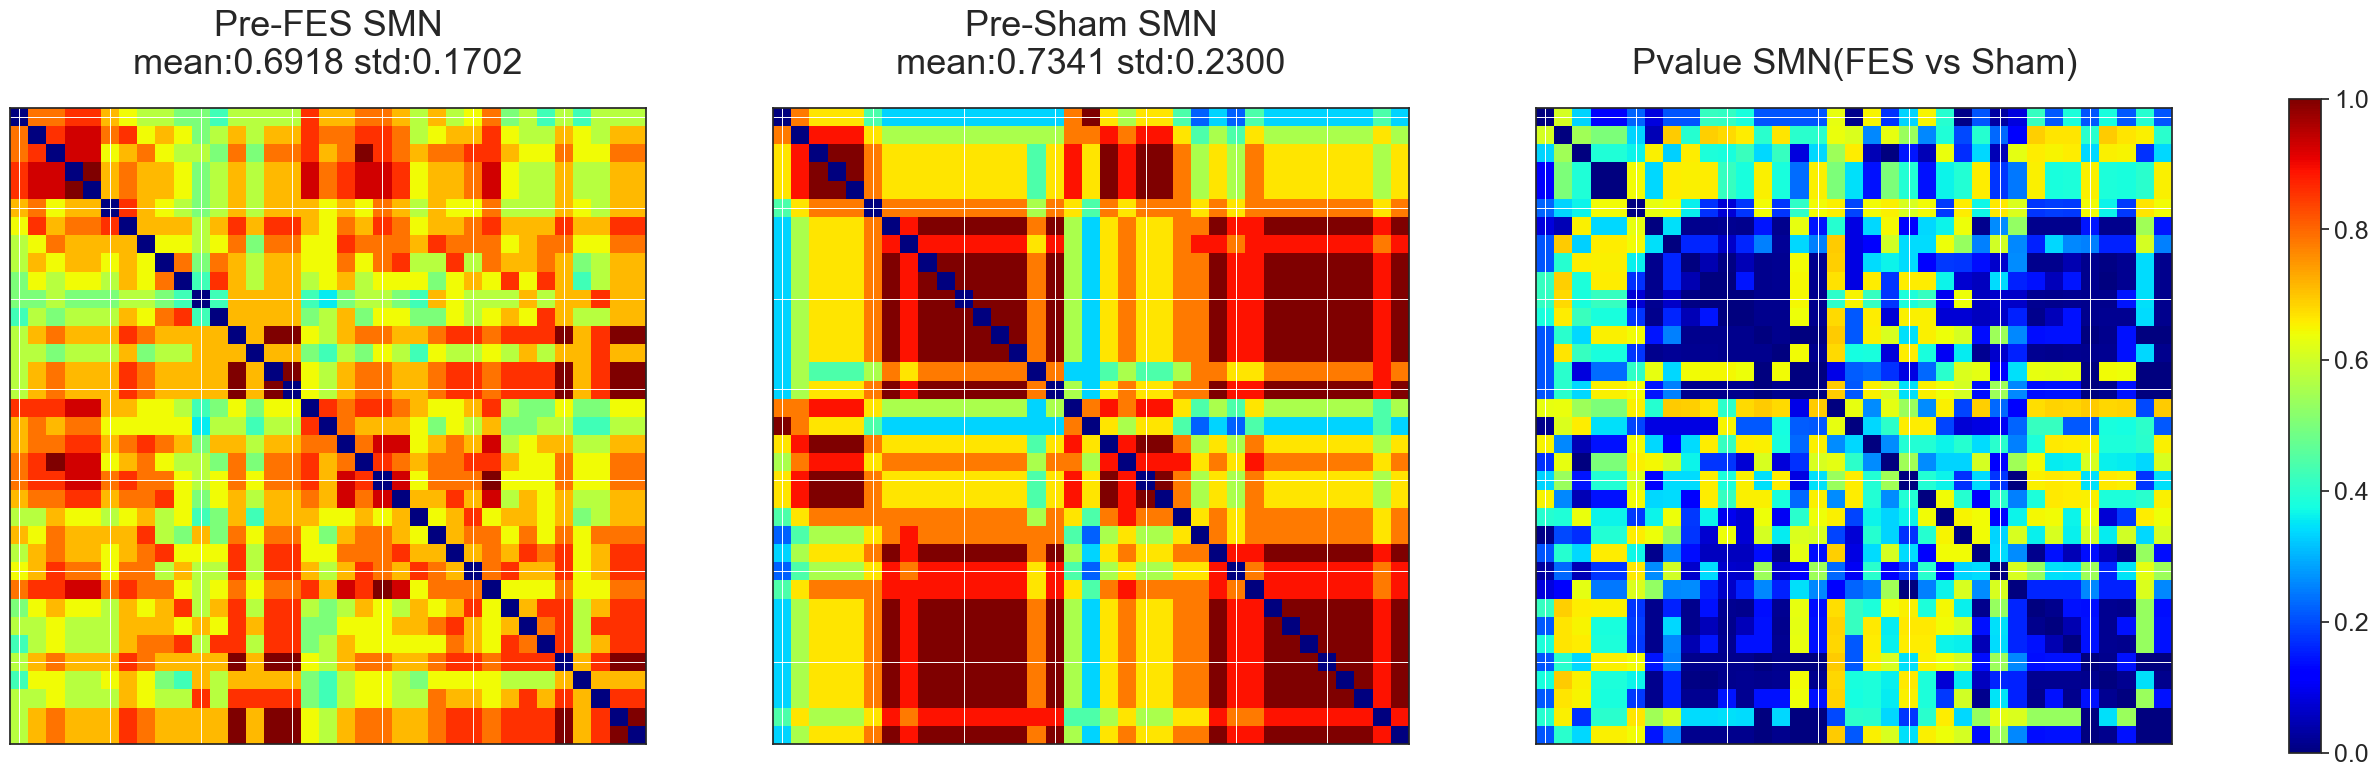

In [297]:
cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# 
# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix 
im1 = axs[0].matshow(alg_smn_a, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'cFES_pre SMN\nmean:{np.mean(alg_smn_a):.4f} std:{np.std(alg_smn_a):.4f}', fontsize=26, y=1.04)


# Plot the second matrix
im2 = axs[1].matshow(alg_smn_b, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'cFES_post SMN\nmean:{np.mean(alg_smn_b):.4f} std:{np.std(alg_smn_b):.4f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(pvalue_smn_alg_c, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue SMN(pre vs post)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

In [115]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 21:27:38.696749


In [3]:
# import pkg_resources

# installed_packages = pkg_resources.working_set
# for package in installed_packages:
#     print(f"{package.key}=={package.version}")